In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import os
import pandas as pd

<function matplotlib.pyplot.xlabel(xlabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)>

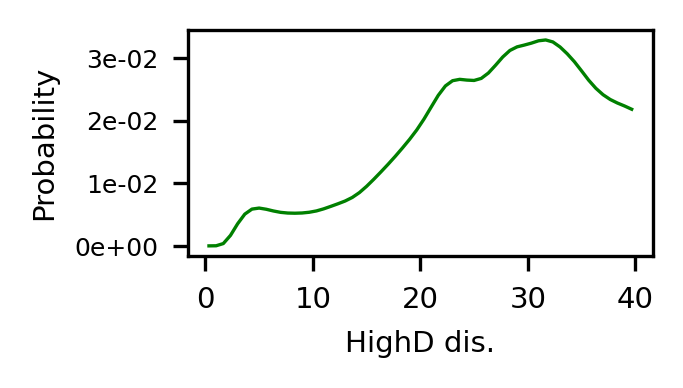

In [2]:
cwd=os.getcwd()
# draw the distribution of high-dimensional data
hddist=np.loadtxt(os.path.join(cwd,"smap/hCaM/highd-histo"),comments='#')

import matplotlib.ticker as ticker

def fmt(x,pos):
    return "{:.0e}".format(x)
   
from matplotlib import rcParams
rcParams['figure.figsize'] = 2,1
rcParams['figure.dpi'] = 300
plt.plot(hddist[:,0],hddist[:,1],'g',lw=0.8)
plt.xticks([0,10,20,30,40],fontsize=7)
plt.xlabel('HighD dis.',fontsize=7)

plt.yticks([0,0.01,0.02,0.03],fontsize=6)
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(fmt))
plt.ylabel('Probability',fontsize=7)

plt.xlabel

In [3]:
x = 0.035
print ("the number is {:.1e}".format(x))

the number is 3.5e-02


In [4]:
# read in the smap data
datadir = "/home/binsun/Downloads/sCaM/sCaM/smap/"
cases = ['hCaM','sCaM1','sCaM4']

    
landmarks = {i:np.loadtxt(datadir + i + "/" +"hddata",comments='#') for i in cases}
projectData = {i:np.loadtxt(datadir + i + "/" +"FULL_PROJECTION",comments='#') for i in cases}


#def read_datafile(indx=False):
#    if not indx:
#        gmds=np.loadtxt(os.path.join(cwd,"smap/hCaM/lowd.gmds"),comments='#')
#    else:
#        gmds=np.loadtxt(os.path.join(cwd,"smap/hCaM/lowd.gmds_%d" % (indx)),comments='#')
                        
#    return gmds

    

In [5]:
from matplotlib import rcParams
from scipy.stats import gaussian_kde
#rcParams['figure.figsize'] = 2.5,2
#rcParams['figure.dpi'] = 200


In [6]:
def get_density(data):
    x_axis=data[:,0]
    y_axis=data[:,1]
    zdata=np.vstack((x_axis,y_axis))
    z = gaussian_kde(zdata)(zdata)
    idx = z.argsort()
    x, y, z = data[:,0][idx], data[:,1][idx], z[idx]
    Zmax = np.max(z)
    energy = -np.log(z/Zmax)
    
    return x,y,z,Zmax

In [7]:
# maximum density of the projection
# z is the point density, zmax is the maximum value
hCaMx,hCaMy,hCaMz,hCaMzmax = get_density(projectData['hCaM'])


In [8]:
sCaM1x,sCaM1y,sCaM1z,sCaM1zmax = get_density(projectData['sCaM1'])


In [9]:
sCaM4x,sCaM4y,sCaM4z,sCaM4zmax = get_density(projectData['sCaM4'])

In [10]:
# the maxDensity of all three cases
maxDensity = np.max([hCaMzmax,sCaM1zmax,sCaM4zmax])

In [11]:
ZeroDensity=np.exp(-8.5)*maxDensity

In [12]:
print (ZeroDensity)

3.601315292236557e-08


In [13]:
# calcualte eneergy difference based on the maxDensity
def relativeEnerggy(density,baseDensity):
    """
    calculate the relative energy basd on the ratio of 
    density to baseDensity
    """
    energy = -np.log(density/baseDensity)
    return energy

In [14]:
hCaMrE = relativeEnerggy(hCaMz,ZeroDensity)
sCaM1rE = relativeEnerggy(sCaM1z,ZeroDensity)
sCaM4rE = relativeEnerggy(sCaM4z,ZeroDensity)

In [15]:
from scipy import spatial


In [16]:
print (hCaMx)

[ 400.            2.01005025 -259.29648241 ...  -10.05025126  -10.05025126
  -10.05025126]


In [17]:
print (hCaMrE)

[ 0.61830404  0.61555006  0.61002294 ... -8.10625221 -8.10625221
 -8.10625221]


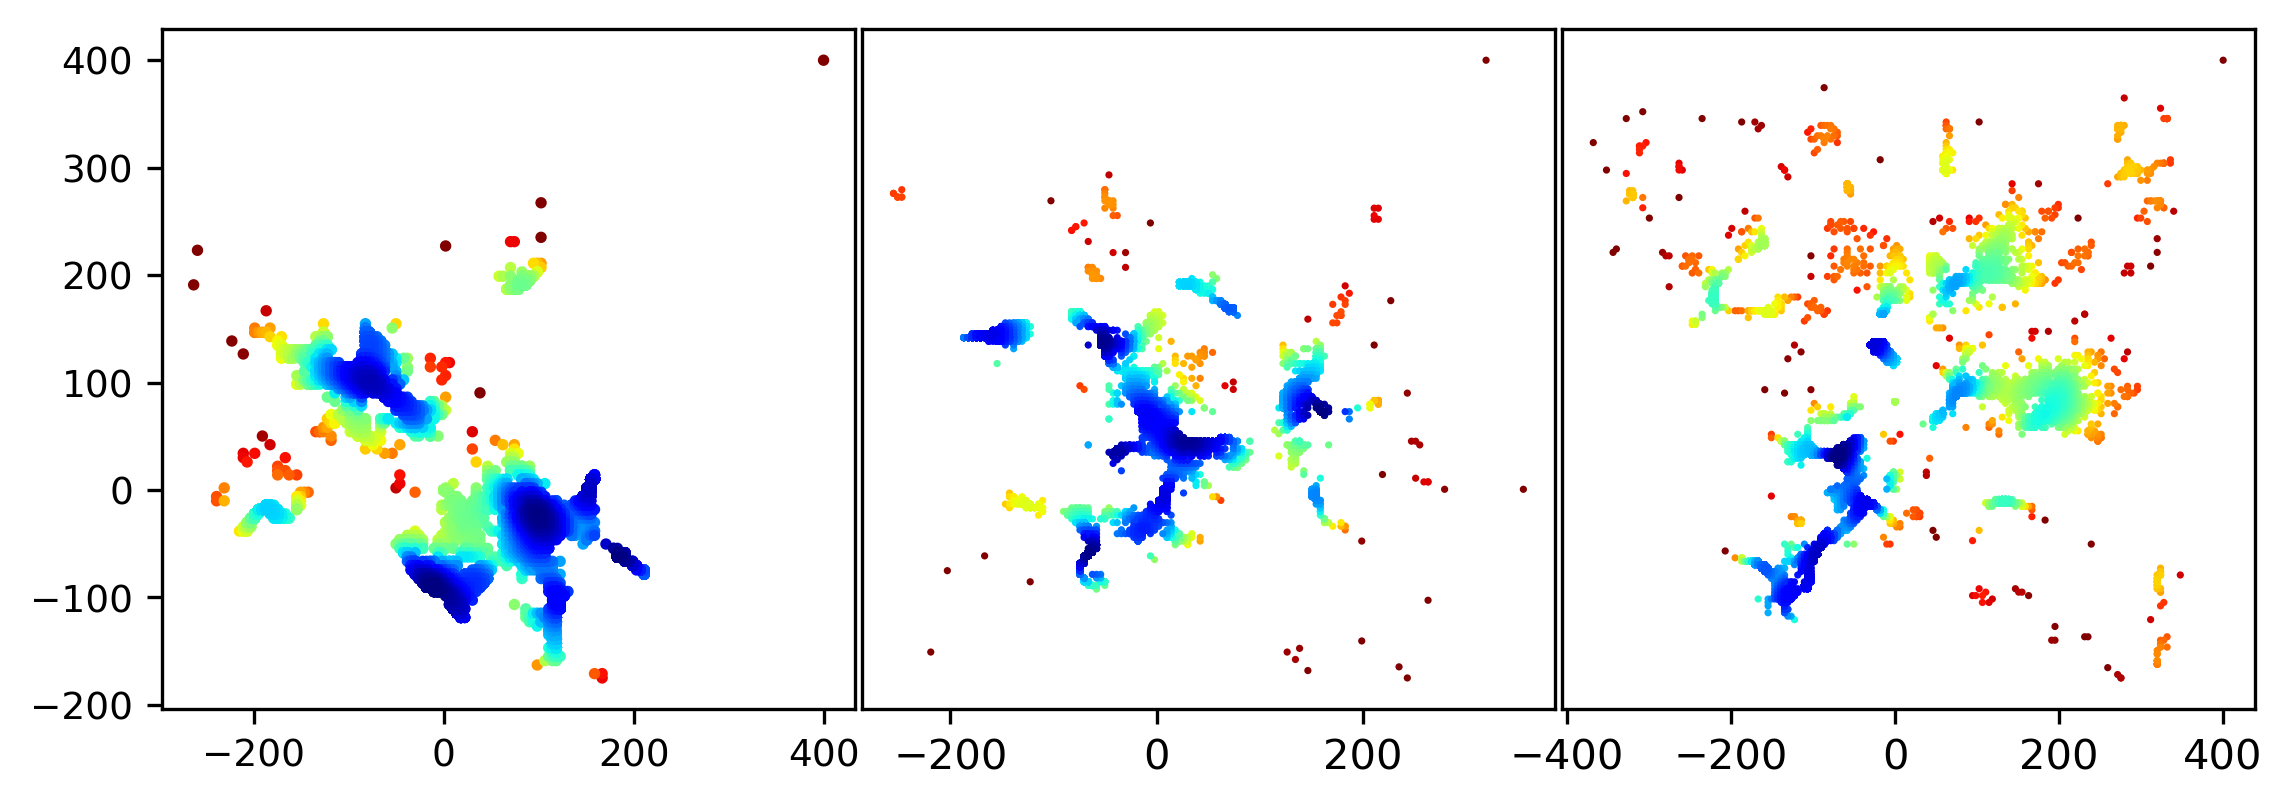

In [18]:
plt.figure(figsize=(9,3))
plt.subplot(1,3,1)
plt.scatter(hCaMx,hCaMy,c=hCaMrE,cmap="jet",s=3,vmax=0) #,s=3,edgecolor='',cmap='jet',vmax=0)
plt.yticks(fontsize=9)
plt.xticks(fontsize=9)
#plt.colorbar()
plt.subplot(1,3,2)
plt.scatter(sCaM1x,sCaM1y,c=sCaM1rE,s=3,edgecolor='none',cmap='jet',vmax=0)
plt.yticks([])
plt.subplot(1,3,3)
plt.scatter(sCaM4x,sCaM4y,c=sCaM4rE,s=3,edgecolor='none',cmap='jet',vmax=0)

plt.plot([])
plt.yticks([])
plt.subplots_adjust(wspace=0.01)

In [19]:
from matplotlib.colors import ListedColormap,LinearSegmentedColormap
vmax = 0

cmap = LinearSegmentedColormap.from_list('mycmap',[(0, 'w'),(0.33,'cyan'),(0.66, 'yellow'),(1, 'r')])
cmap = ListedColormap(['blue','blue','white','white','white','white'])

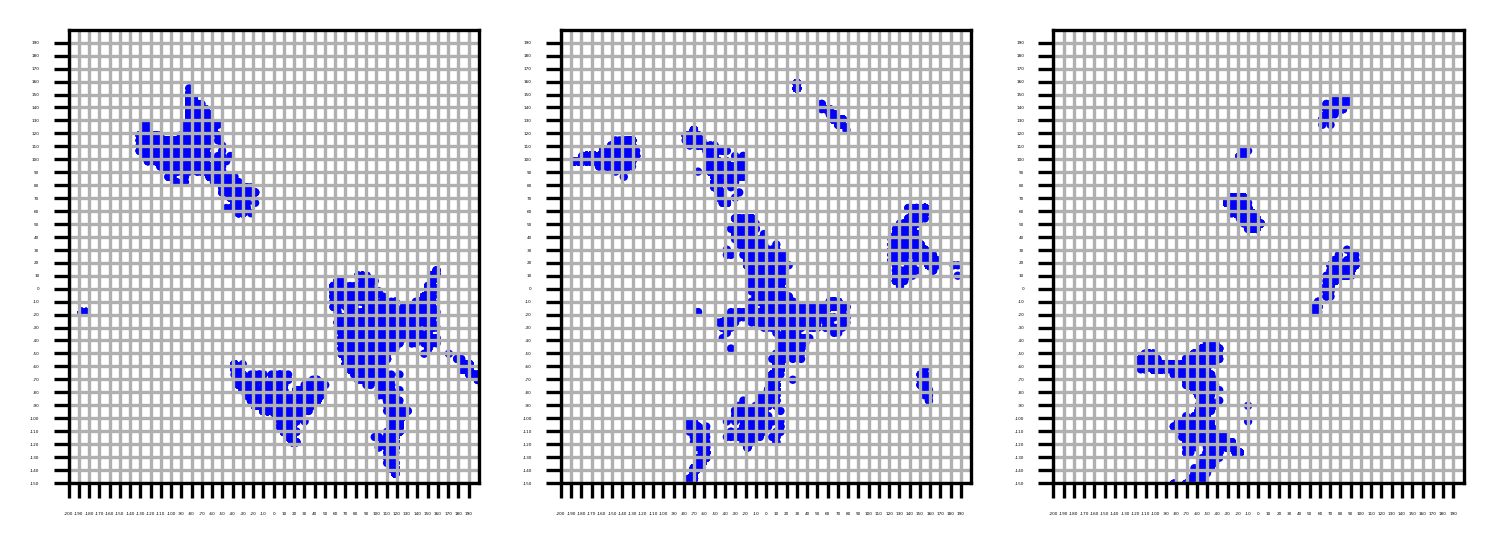

In [20]:
# < -5.6 KT
area=2
plt.figure(figsize=(6,2))
plt.subplot(1,3,1)
plt.scatter(hCaMx,hCaMy,c=hCaMrE,s=4,edgecolor='none',cmap=cmap,vmax=0)
plt.yticks(np.arange(-150,200,10),np.arange(-150,200,10),fontsize=1)
plt.xticks(np.arange(-200,200,10),np.arange(-200,200,10),fontsize=1)
plt.ylim([-150,200])
plt.xlim([-200,200])
plt.grid()
#plt.colorbar()
plt.subplot(1,3,2)
plt.scatter(sCaM1x,sCaM1y,c=sCaM1rE,s=4,edgecolor='none',cmap=cmap,vmax=0)
plt.yticks(np.arange(-150,200,10),np.arange(-150,200,10),fontsize=1)
plt.xticks(np.arange(-200,200,10),np.arange(-200,200,10),fontsize=1)
plt.ylim([-150,200])
plt.xlim([-200,200])
#plt.yticks([])
plt.grid()
plt.subplot(1,3,3)
plt.scatter(sCaM4x,sCaM4y,c=sCaM4rE,s=4,edgecolor='none',cmap=cmap,vmax=0)
plt.yticks(np.arange(-150,200,10),np.arange(-150,200,10),fontsize=1)
plt.xticks(np.arange(-200,200,10),np.arange(-200,200,10),fontsize=1)
plt.ylim([-150,200])
plt.xlim([-200,200])
#plt.yticklabel([])
#plt.yticks([])
plt.grid()
#plt.colorbar()

In [22]:
X, Y = np.mgrid[-200:200:100j, -150:200:100j]

In [64]:
def get_densityArea(data):
    """
    Estimate the enery on a envenly spaced grids, 
    then the area of <-5.6 KT can be directly approximated as the number of elements
    that satisfy the criteria
    """
    
    # constructing grids mainly on the following grids, as the low 
    # energy area are mainly focused on this area
    
    X, Y = np.mgrid[-200:200:100j, -150:200:100j]
    
    pos = np.vstack((X.ravel(),Y.ravel()))
                         
    x_axis=data[:,0]
    y_axis=data[:,1]
    zdata=np.vstack((x_axis,y_axis))
    z = gaussian_kde(zdata)(pos)
    
    # calculate the energy
    energy = relativeEnerggy(z,ZeroDensity)
    
    
    #creat a mask that sets energy < -5.6 elements as 1.0
    # and > 5.6 elements as 0.0
    mask = energy.copy()
    mask[energy<-5.6] = 1.0
    mask[energy>=-5.6] = 0.0

    # area
    area = np.sum(mask)

    
    return area,energy,mask

In [65]:
def generateSample(data,nSample=None):
    """
    randomly generate a sample contaning nSample data points
    """
    numPoints = np.shape(data)[0]# 
    if nSample == None:
        """
        using the number of data points of orginal dataset 
        """
        rows = np.random.choice(numPoints,numPoints)
    else:
        rows = np.random.choice(numPoints,nSample)
        
    sample = data[rows,0:2]

    return sample

In [66]:
# new data, automatically calculate the area

hCaMtest = generateSample(projectData['hCaM'])
hCaMarea,temp,hCaMmask = get_densityArea(hCaMtest)

sCaM1test = generateSample(projectData['sCaM1'])
sCaM1area,temp,sCaM1mask = get_densityArea(sCaM1test)

sCaM4test = generateSample(projectData['sCaM4'])
sCaM4area,temp,sCaM4mask = get_densityArea(sCaM4test)

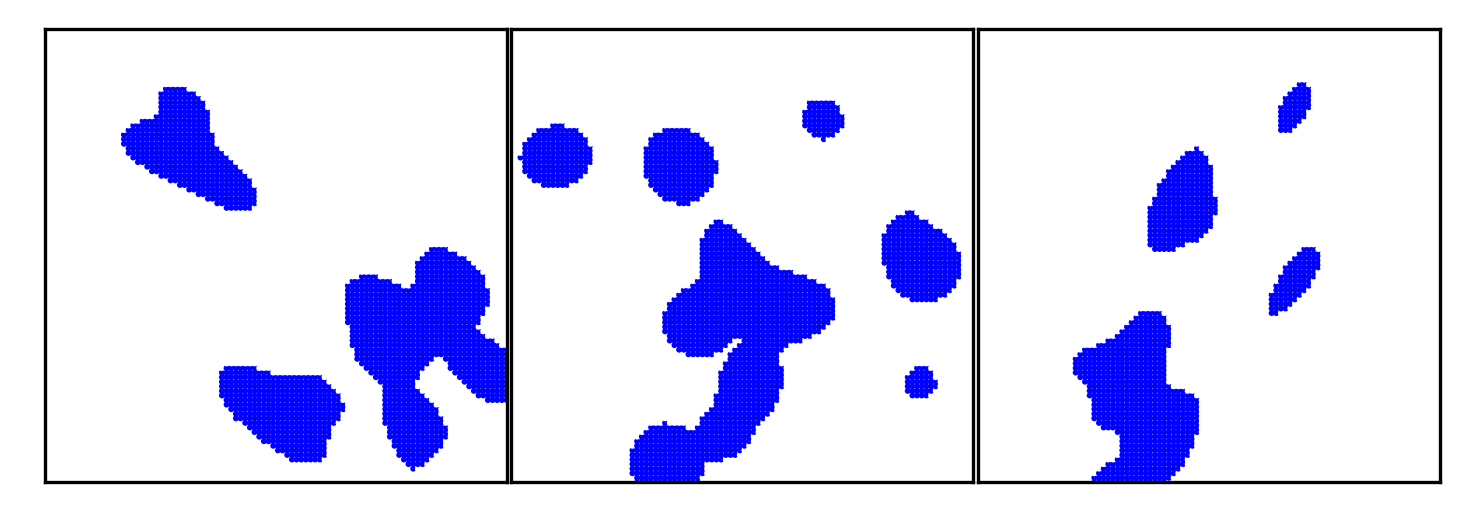

In [67]:
cmap = ListedColormap(['white','blue'])
area=2
plt.figure(figsize=(6,2))
plt.subplot(1,3,1)
plt.scatter(X,Y,c=hCaMmask,s=area,edgecolor='none',cmap=cmap)
#plt.yticks(np.arange(-150,200,10),np.arange(-150,200,10),fontsize=1)
#plt.xticks(np.arange(-200,200,10),np.arange(-200,200,10),fontsize=1)
plt.xticks([])
plt.yticks([])
plt.ylim([-150,200])
plt.xlim([-200,200])
#plt.colorbar()
plt.subplot(1,3,2)
plt.scatter(X,Y,c=sCaM1mask,s=area,edgecolor='none',cmap=cmap)
#plt.yticks(np.arange(-150,200,10),np.arange(-150,200,10),fontsize=1)
#plt.xticks(np.arange(-200,200,10),np.arange(-200,200,10),fontsize=1)
plt.xticks([])
plt.yticks([])
plt.ylim([-150,200])
plt.xlim([-200,200])

plt.subplot(1,3,3)
plt.scatter(X,Y,c=sCaM4mask,s=area,edgecolor='none',cmap=cmap)
#plt.yticks(np.arange(-150,200,10),np.arange(-150,200,10),fontsize=1)
#plt.xticks(np.arange(-200,200,10),np.arange(-200,200,10),fontsize=1)
plt.ylim([-150,200])
plt.xlim([-200,200])
plt.xticks([])
plt.yticks([])
plt.subplots_adjust(wspace=0.01)
#plt.colorbar()

In [68]:
# now do the bootsampling
hCaMareas = []
for i in range(40):
    sample = generateSample(projectData['hCaM'])
    area, temp,temp2 = get_densityArea(sample)
    hCaMareas.append(area)

In [69]:
# now do the bootsampling
sCaM1areas = []
for i in range(40):
    sample = generateSample(projectData['sCaM1'])
    area, temp,temp2 = get_densityArea(sample)
    sCaM1areas.append(area)

In [70]:
# now do the bootsampling
sCaM4areas = []
for i in range(40):
    sample = generateSample(projectData['sCaM4'])
    area, temp,temp2 = get_densityArea(sample)
    sCaM4areas.append(area)

In [71]:
print (hCaMareas,np.std(hCaMareas))

[1738.0, 1727.0, 1729.0, 1727.0, 1728.0, 1733.0, 1729.0, 1730.0, 1731.0, 1737.0, 1731.0, 1726.0, 1731.0, 1733.0, 1737.0, 1727.0, 1735.0, 1730.0, 1733.0, 1731.0, 1733.0, 1731.0, 1735.0, 1727.0, 1741.0, 1727.0, 1737.0, 1731.0, 1733.0, 1730.0, 1727.0, 1731.0, 1730.0, 1733.0, 1731.0, 1733.0, 1736.0, 1730.0, 1734.0, 1731.0] 3.462657938636157


In [72]:
print (sCaM1areas,np.std(sCaM1areas))

[1871.0, 1872.0, 1872.0, 1863.0, 1864.0, 1865.0, 1867.0, 1872.0, 1883.0, 1863.0, 1883.0, 1867.0, 1860.0, 1863.0, 1866.0, 1867.0, 1858.0, 1866.0, 1874.0, 1873.0, 1865.0, 1881.0, 1874.0, 1867.0, 1866.0, 1860.0, 1866.0, 1870.0, 1870.0, 1868.0, 1862.0, 1870.0, 1865.0, 1871.0, 1875.0, 1862.0, 1871.0, 1866.0, 1869.0, 1871.0] 5.691880181451468


In [73]:
print (sCaM4areas,np.std(sCaM4areas))

[1030.0, 1035.0, 1032.0, 1031.0, 1033.0, 1046.0, 1021.0, 1033.0, 1031.0, 1030.0, 1036.0, 1036.0, 1027.0, 1031.0, 1024.0, 1030.0, 1033.0, 1031.0, 1029.0, 1026.0, 1032.0, 1036.0, 1029.0, 1030.0, 1026.0, 1038.0, 1039.0, 1031.0, 1037.0, 1028.0, 1036.0, 1030.0, 1036.0, 1042.0, 1033.0, 1028.0, 1034.0, 1037.0, 1033.0, 1035.0] 4.715334028465004


In [74]:
print (np.mean(hCaMareas),np.mean(sCaM1areas),np.mean(sCaM4areas))

1731.6 1868.45 1032.375


In [76]:
print (stdpct)

[0.00199969 0.00304631 0.00456746]


([<matplotlib.axis.XTick at 0x7f77f733ecd0>,
 [Text(0, 0, 'mCaM'), Text(1, 0, 'sCaM-1'), Text(2, 0, 'sCaM-4')])

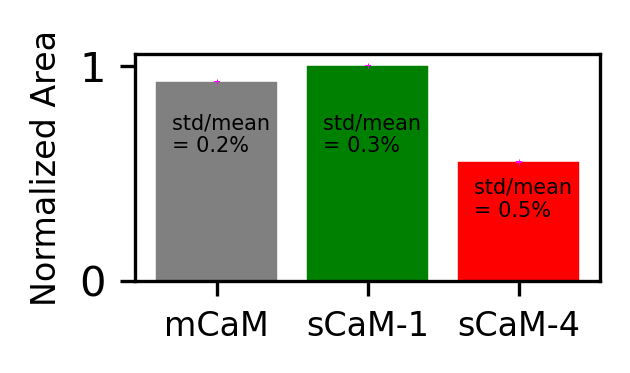

In [100]:
stdpct = np.array([np.std(hCaMareas)/np.mean(hCaMareas),np.std(sCaM1areas)/np.mean(sCaM1areas),\
       np.std(sCaM4areas)/np.mean(sCaM4areas)])*100

norAreas= np.array([np.mean(hCaMareas),np.mean(sCaM1areas),np.mean(sCaM4areas)])/np.mean(sCaM1areas)
err = norAreas*stdpct
colors=['gray','green','red']
barlist=plt.bar(np.arange(3),norAreas,yerr=err/100,ecolor="magenta",lw=0.1 ,capsize=0.1)
plt.text(-0.3,0.6,"std/mean \n= %3.1f%s" % (stdpct[0],"%"),fontsize=5)
plt.text(0.7,0.6,"std/mean \n= %3.1f%s" % (stdpct[1],"%"),fontsize=5)
plt.text(1.7,0.3,"std/mean \n= %3.1f%s" % (stdpct[2],"%"),fontsize=5)


for i,j in enumerate(barlist):
    j.set_color(colors[i])
plt.ylabel("Normalized Area",fontsize=8)
plt.xticks([0,1,2],['mCaM','sCaM-1','sCaM-4'],fontsize=8)

In [21]:
# previous data
# area < 3KT 
Area = {'hCaM':139,
        'sCaM1':105,
        'sCaM4': 56
       }

In [22]:
print (np.asarray(list(Area.values()))/Area['hCaM'])

[1.         0.75539568 0.4028777 ]


([<matplotlib.axis.XTick at 0x7f6c6f701be0>,
 <a list of 3 Text xticklabel objects>)

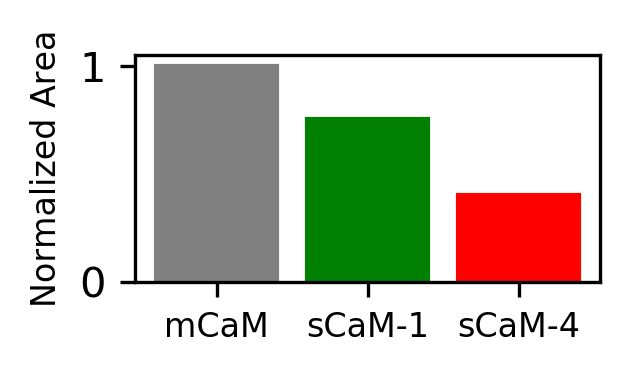

In [23]:
colors=['gray','green','red']
barlist=plt.bar(np.arange(3),np.asarray(list(Area.values()))/Area['hCaM'])
for i,j in enumerate(barlist):
    j.set_color(colors[i])
plt.ylabel("Normalized Area",fontsize=8)
plt.xticks([0,1,2],['mCaM','sCaM-1','sCaM-4'],fontsize=8)